# Automatic report creation

This example shows how to create reports from a JSON template file.


Keywords: **Circuit**, **report**.

## Perform imports and define constants

Import the required packages. This example uses
data from the [example-data repository](https://github.com/ansys/example-data/tree/master)
located in ``pyaedt\custom_reports``.

In [1]:
import os
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.examples.downloads import download_file
from IPython.display import Image

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Launch AEDT with Circuit

AEDT is started by instantiating an instance of
[pyaedt.Circuit](https://aedt.docs.pyansys.com/version/stable/API/_autosummary/pyaedt.circuit.Circuit.html).

### Application keyword arguments

- The argument ``non_graphical`` specifies whether an interactive session is launched or if
  AEDT is to run in non-graphical mode.
- The Boolean parameter ``new_desktop`` specifies if a new instance
  of AEDT is launched. If it is set to ``False``, the API tries to connect to a running session.

This example extracts an archived project. The full path
to the extracted project is accessible from the ``cir.project_file`` property.

In [4]:
project_path = download_file(
    source="custom_reports/", local_path=temp_folder.name
)

circuit = ansys.aedt.core.Circuit(
    project=os.path.join(project_path, "CISPR25_Radiated_Emissions_Example23R1.aedtz"),
    non_graphical=NG_MODE,
    version=AEDT_VERSION,
    new_desktop=True,
)
circuit.analyze()  # Run the circuit analysis.

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_fd786a3e-f758-40a6-bf4b-24104d631ca9.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 6356.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Archive CISPR25_Radiated_Emissions_Example23R1 has been restored to project CISPR25_Radiated_Emissions_Example23R1


PyAEDT INFO: Active Design set to 1;CISPR25_Radiated_Emissions_Circuit


PyAEDT INFO: Active Design set to 1;CISPR25_Radiated_Emissions_Circuit


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: Project CISPR25_Radiated_Emissions_Example23R1 Saved correctly


PyAEDT INFO: Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 27.0s


True

## Create a spectral report

The JSON file is used to customize the report. In a spectral report, you can add limit lines. You can also
add notes to a report and modify the axes, grid, and legend. Custom reports
can be created in AEDT in non-graphical mode using version 2023 R2 and later.

In [5]:
report1 = circuit.post.create_report_from_configuration(
    os.path.join(project_path, "Spectrum_CISPR_Basic.json")
)
out = circuit.post.export_report_to_jpg(
    project_path=circuit.working_directory, plot_name=report1.plot_name
)

PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Report Plot_XFZCV8 created successfully.


Render the image.

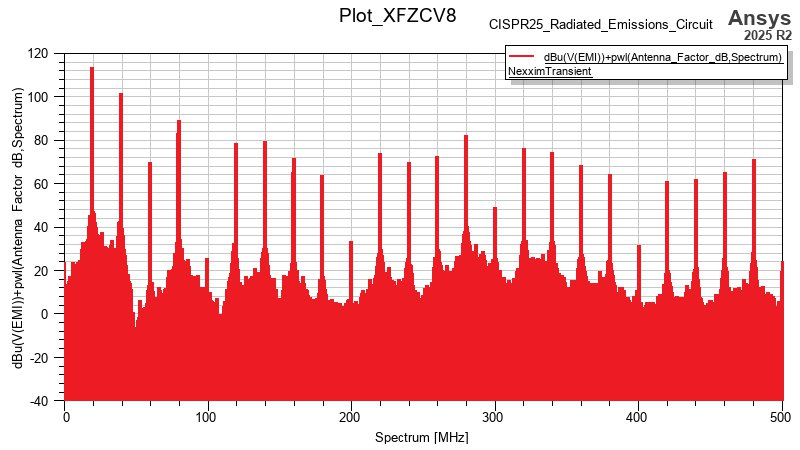

In [6]:
Image(os.path.join(circuit.working_directory, report1.plot_name + ".jpg"))

You can customize every aspect of the report. The method ``crate_report_from_configuration()`` reads the
report configuration from a JSON file and generates the custom report.

PyAEDT INFO: Report Plot_W6BV1D created successfully.


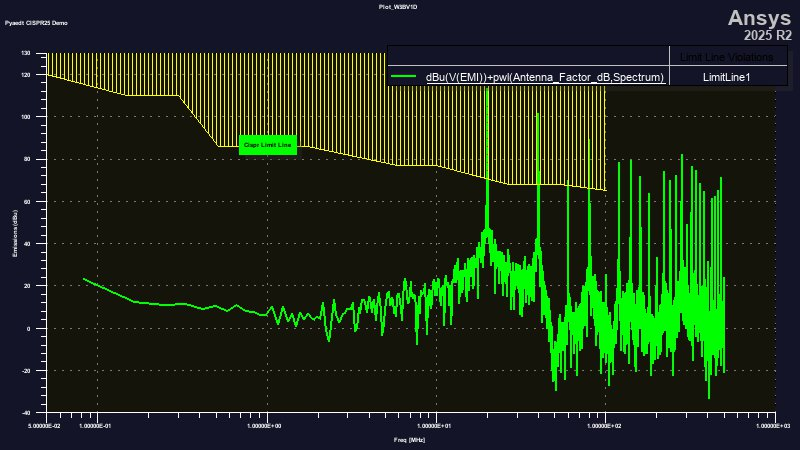

In [7]:
report1_full = circuit.post.create_report_from_configuration(
    os.path.join(project_path, "Spectrum_CISPR_Custom.json")
)
out = circuit.post.export_report_to_jpg(
    circuit.working_directory, report1_full.plot_name
)
Image(os.path.join(circuit.working_directory, report1_full.plot_name + ".jpg"))

## Create a transient report

The JSON configuration file can be read and modified from the API prior to creating the report.
The following code modifies the trace rendering prior to creating the report.

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpxf9qpjd0.ansys\custom_reports\CISPR25_Radiated_Emissions_Example23R1.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpxf9qpjd0.ansys\custom_reports\CISPR25_Radiated_Emissions_Example23R1.aedt correctly loaded. Elapsed time: 0m 1sec


PyAEDT INFO: aedt file load time 0.6478335857391357


PyAEDT INFO: Report Plot_62K9YD created successfully.


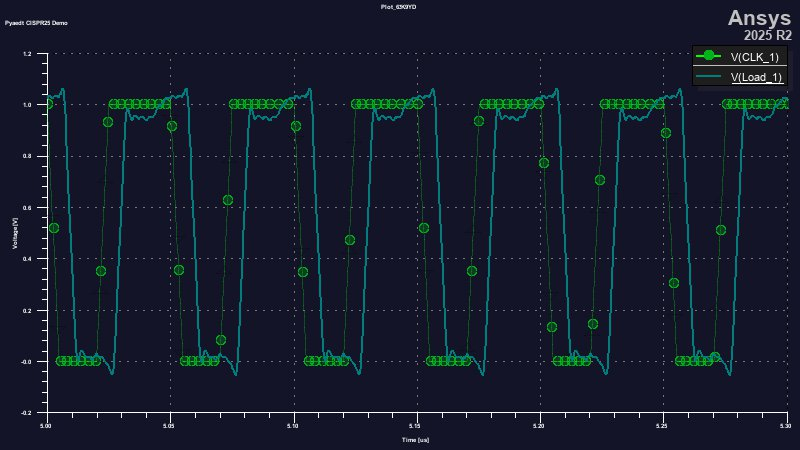

In [8]:
props = ansys.aedt.core.generic.file_utils.read_json(
    os.path.join(project_path, "Transient_CISPR_Custom.json")
)

report2 = circuit.post.create_report_from_configuration(
    report_settings=props, solution_name="NexximTransient"
)
out = circuit.post.export_report_to_jpg(circuit.working_directory, report2.plot_name)
Image(os.path.join(circuit.working_directory, report2.plot_name + ".jpg"))

The ``props`` dictionary can be used to customize any aspect of an existing report or generate a new report.
In this example, the name of the curve is customized.

PyAEDT INFO: Report Plot_OONAO3 created successfully.


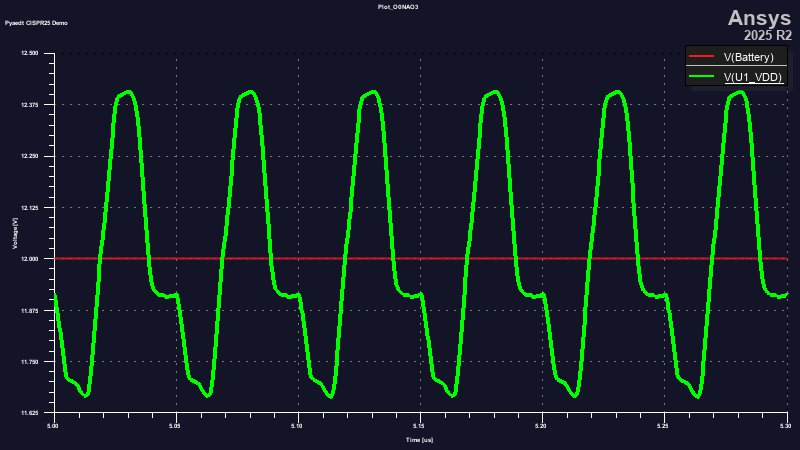

In [9]:
props["expressions"] = {"V(Battery)": {}, "V(U1_VDD)": {}}
props["plot_name"] = "Battery Voltage"
report3 = circuit.post.create_report_from_configuration(
    report_settings=props, solution_name="NexximTransient"
)
out = circuit.post.export_report_to_jpg(circuit.working_directory, report3.plot_name)
Image(os.path.join(circuit.working_directory, report3.plot_name + ".jpg"))

## Create an eye diagram

You can use the JSON file to create an eye diagram. The following code includes the eye.

PyAEDT INFO: Report Plot_051YMX created successfully.


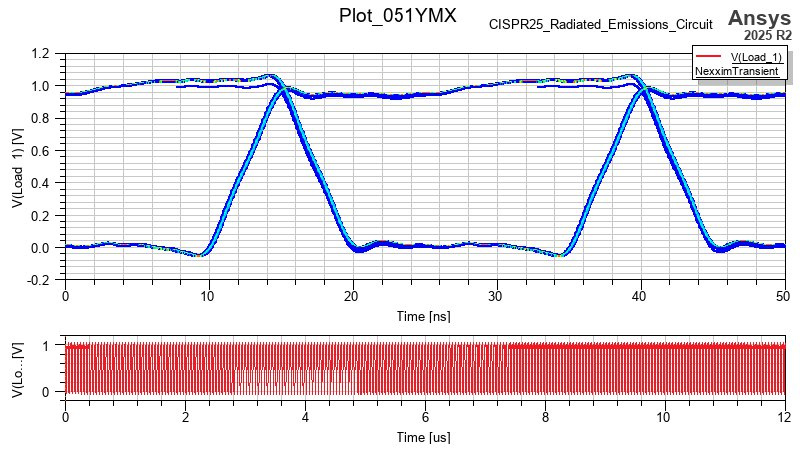

In [10]:
report4 = circuit.post.create_report_from_configuration(
    os.path.join(project_path, "EyeDiagram_CISPR_Basic.json")
)
out = circuit.post.export_report_to_jpg(circuit.working_directory, report4.plot_name)
Image(os.path.join(circuit.working_directory, report4.plot_name + ".jpg"))

PyAEDT INFO: Report Plot_LO13RB created successfully.


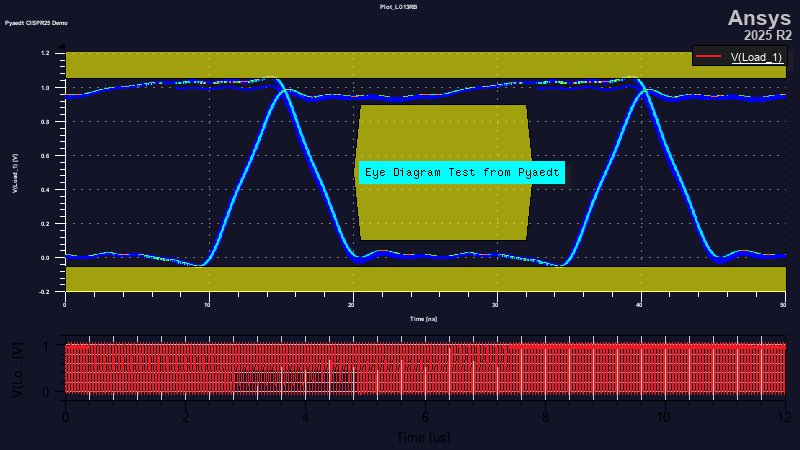

In [11]:
report4_full = circuit.post.create_report_from_configuration(
    os.path.join(project_path, "EyeDiagram_CISPR_Custom.json")
)

out = circuit.post.export_report_to_jpg(
    circuit.working_directory, report4_full.plot_name
)
Image(os.path.join(circuit.working_directory, report4_full.plot_name + ".jpg"))

## Save project and close AEDT

Save the project and close AEDT. The example has finished running. You can retrieve project files
from ``temp_folder.name``.

In [12]:
circuit.save_project()
print("Project Saved in {}".format(circuit.project_path))

PyAEDT INFO: Project CISPR25_Radiated_Emissions_Example23R1 Saved correctly


Project Saved in C:/Users/ansys/AppData/Local/Temp/tmpxf9qpjd0.ansys/custom_reports/


In [13]:
circuit.release_desktop()
time.sleep(3)

PyAEDT INFO: Desktop has been released and closed.


## Clean up

The following cell cleans up the temporary directory and
removes all project files.

In [14]:
temp_folder.cleanup()